# How to link `ipywidgets` widget with `matplotlib` chart to dynamically update charts?


The `matplotlib` is the most frequently used and quite famous python library for plotting charts. It has been extensively developed over the years and provides extensive API for plotting various charts. All the charts generated by `matplotlib` are static. When doing exploratory data analysis, its quite common to explore data from various perspectives to understand it better. We can merge `matplotlib` charts with `ipywidgets` widgets in order to generate interactive charts which updates itself whenever the values of widget changes.
 
As a part of this tutorial, we'll be explaining how `ipywidgets` widgets can be linked to `matplotlib` charts to make them interactive. We have already covered an extensive tutorial on `ipywidgets` which is available here:

In [1]:
%matplotlib widget

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import ipywidgets as widgets

# import warnings
# warnings.filterwarnings("ignore")

%matplotlib widget

from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["FlowerType"] = iris.target #[iris.target_names[t] for t in iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),FlowerType
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* ### Example
The first example consists of drawing scatter plot showing the relationship between two measurements of IRIS flower color-encoded by flower type. We'll be creating two dropdowns for trying various combinations of parameters to understand the relationship between all features combinations of the dataset. There are 4 features of the dataset which are petal width, petal length, sepal width, and sepal length. The dropdowns can be used to check the relationship between all of them.

We have created a method named `create_scatter()` which takes two string parameters which are x and y-axis features names of the dataset that will be used to create a scatter plot.

interactive(children=(Dropdown(description='feature1', options=('sepal length (cm)', 'sepal width (cm)', 'peta…

<function __main__.create_scatter(feature1, feature2)>

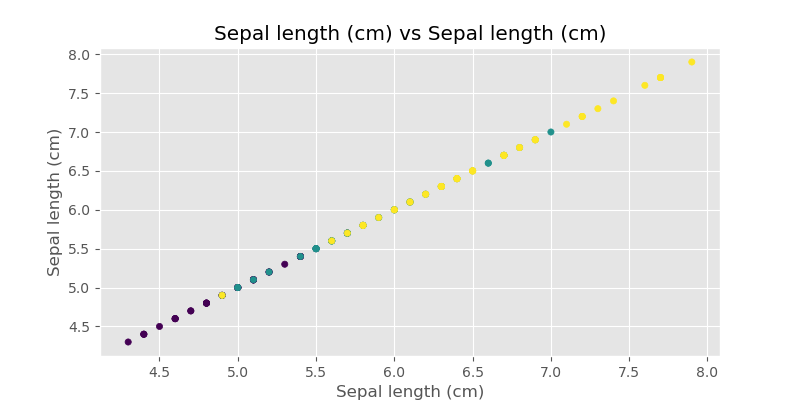

In [3]:
def create_scatter(feature1, feature2):
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8,4))

        plt.scatter(x = iris_df[feature1],
                    y = iris_df[feature2],
                    c=iris_df["FlowerType"],
                    s=20
                   )

        plt.xlabel(feature1.capitalize())
        plt.ylabel(feature2.capitalize())

        plt.title(f"{feature1.capitalize()} vs {feature2.capitalize()}")

widgets.interact(create_scatter, feature1=iris.feature_names, feature2=iris.feature_names)


interactive(children=(Dropdown(description='feature1', options=('sepal length (cm)', 'sepal width (cm)', 'peta…

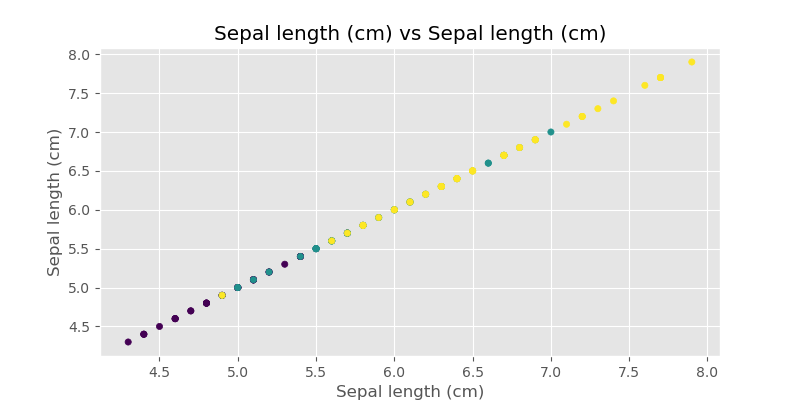

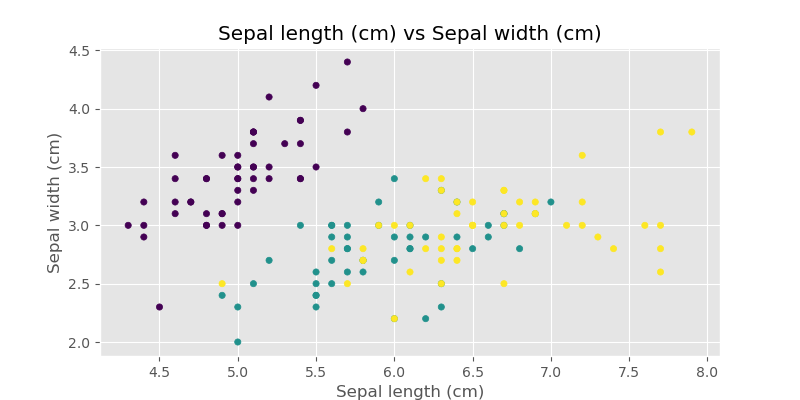

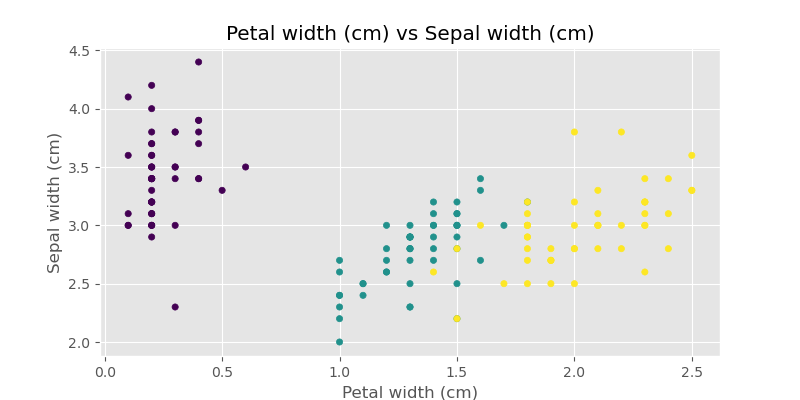

In [4]:
@widgets.interact(feature1=iris.feature_names, feature2=iris.feature_names)
def create_scatter(feature1, feature2):
    with plt.style.context("ggplot"):
        fig = plt.figure(figsize=(8,4))

        plt.scatter(x = iris_df[feature1],
                    y = iris_df[feature2],
                    c=iris_df["FlowerType"],
                    s=20
                   )

        plt.xlabel(feature1.capitalize())
        plt.ylabel(feature2.capitalize())

        plt.title(f"{feature1.capitalize()} vs {feature2.capitalize()}")